In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

_Read the dataset_

In [ ]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [ ]:
df['species'] = df['species'].map({'Iris-setosa' :0, 'Iris-versicolor' :1, 'Iris-virginica' :2}).astype(int)

In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


_Exploratory Data Analysis_

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


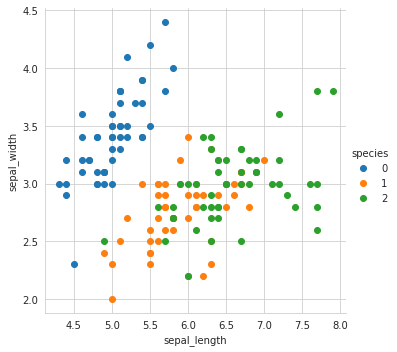

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='species', size=5) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend();
plt.show()

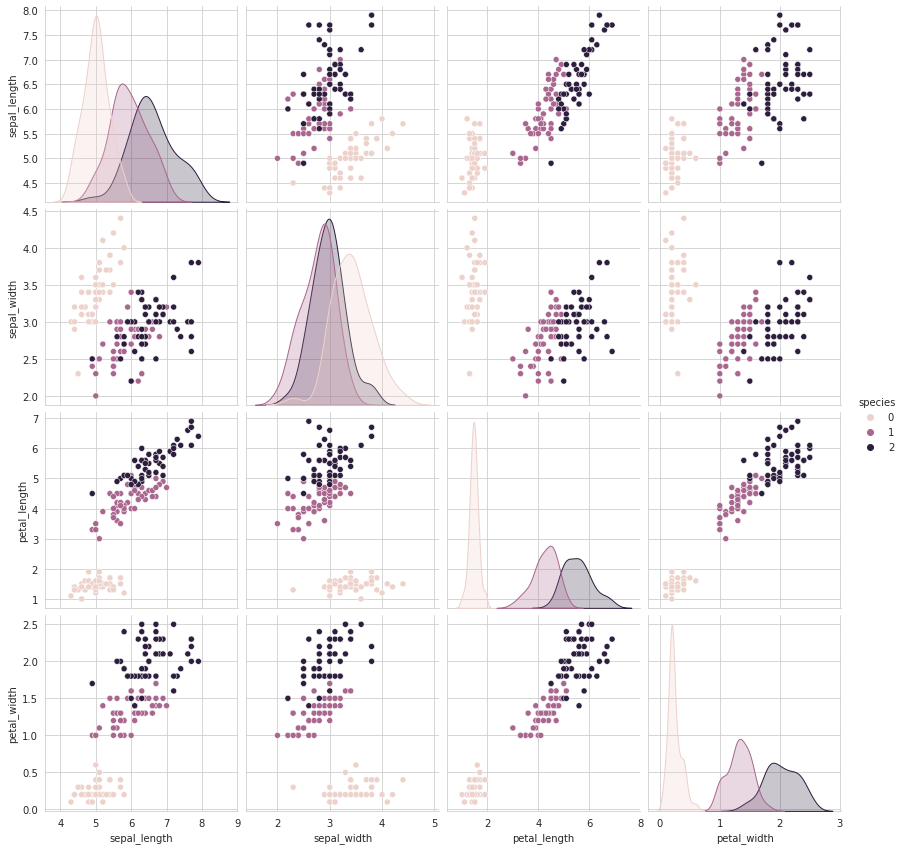

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="species", height=3);
plt.show()

In [15]:
sns.cubehelix_palette()

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8559578605899612, 0.6418993116910497, 0.6754191211563135],
 [0.739734329496642, 0.4765280683170713, 0.5959617419736206],
 [0.57916573903086, 0.33934576125314425, 0.5219003947563425],
 [0.37894937987024996, 0.2224702044652721, 0.41140014301575434],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

EDA Inferences:
<br>1. Species 0 is much easily identifiable then 1 & 2 as they both have some overlap
<br>2. Petal length and width are the most important features.

_Normalising the dataset_

In [ ]:
x_data = df.drop(['species'],axis=1)
y_data = df['species']

In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)

In [ ]:
data = pd.DataFrame(X_data_minmax,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


_Implementing KNN algorithm_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,
                                                    test_size=0.2, random_state = 1)

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
ypred=knn_clf.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, ypred)

0.9666666666666667

_Visualisng Results_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


**Conclusion:**
<br> We successfully implemented a KNN algorithm for the IRIS datset. We found out the most impactful deatures through out EDA and normalised our dataset for improved accuracy.  We got an accuracy of 96.67% with our algorithm as well as we got the confusion matrix and the classification report.